## Analyse data of car accidents in Sweeden.

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.regressionplots import plot_partregress_grid
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats

In [ ]:
# import dataset
url = "https://raw.githubusercontent.com/francji1/01ZLMA/main/data/sweden.csv"
cars = pd.read_csv(url, sep = ',', header=[0])
cars

,Year,Deaths,Cars,Fuel
0,1955,902,755,1531
1,1956,889,855,1657
2,1957,946,987,1738
3,1958,941,1098,1893
4,1959,1000,1216,2011
5,1960,1036,1324,2127
6,1961,1083,1439,2318
7,1962,1123,1562,2394
8,1963,1217,1697,2609
9,1964,1308,1810,2857


In [ ]:
cars.describe()

,Year,Deaths,Cars,Fuel
count,56.000000,56.000000,56.000000,56.000000
mean,1982.500000,850.178571,3152.892857,4412.178571
std,16.309506,292.008101,1179.482347,1308.771875
min,1955.000000,266.000000,755.000000,1531.000000
25%,1968.750000,582.250000,2318.250000,3589.000000
50%,1982.500000,828.500000,3182.500000,4839.500000
75%,1996.250000,1093.000000,3999.000000,5508.250000
max,2010.000000,1313.000000,4884.000000,5910.000000


Dataset contains the number of deaths, he number of registered cars, the annual volume of sold fuels, the number of registered vehicles and the year. Our goal will be to create the best possible model for death rates. Since these are the number of events per unit time, we use the Poisson distribution with the *canonical link function*  $g (\mu) = log(\mu) $.

Because the observed period is relatively long and there have been significant changes in transport, we will only consider data from 1975.

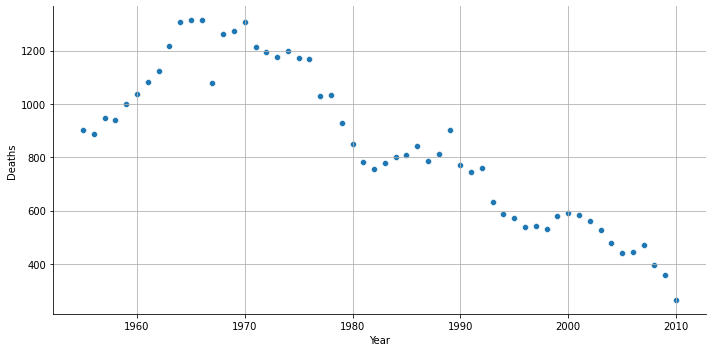

In [ ]:
sns.relplot(x=cars['Year'], y=cars['Deaths'], kind='scatter', aspect=2)
plt.grid()

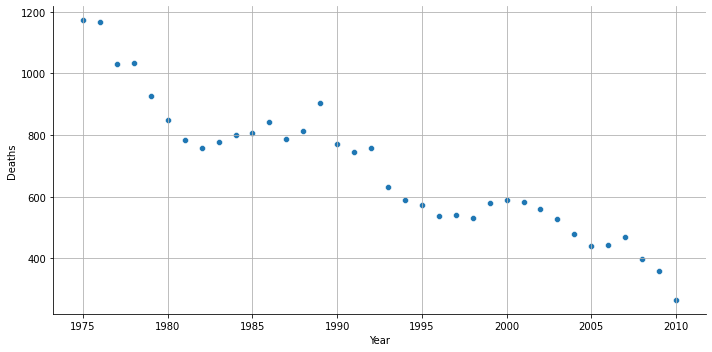

In [ ]:
cars = cars[cars.Year > 1974]
sns.relplot(x=cars['Year'], y=cars['Deaths'], kind='scatter', aspect=2)
plt.grid()

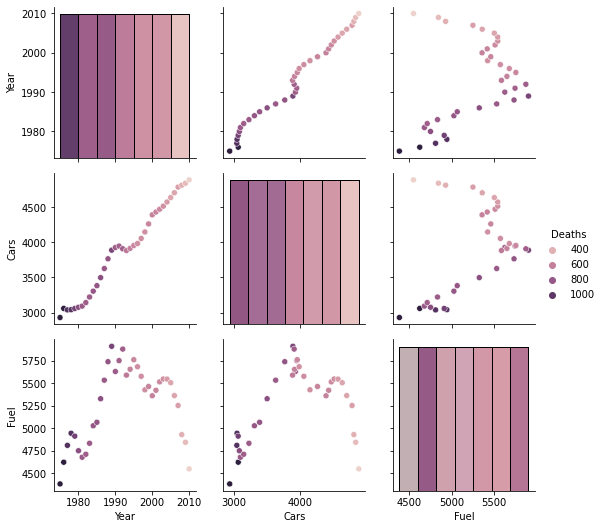

In [ ]:
# basic graphs of dataset
g = sns.PairGrid(cars, hue="Deaths")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

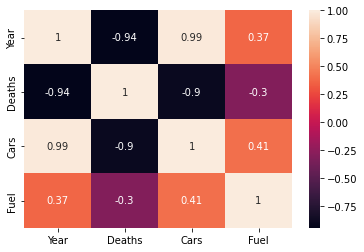

In [ ]:
Var_Corr = cars.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

# Tasks 

* Find the best posssible model. Try add all varariables up to the second order interactions. You can use `step()` function based on `AIC`.
* Analyse residuals and check systematic components. 
* If incorrect linear predictor appears, try to transform corresponding variable. Hint: `Fuel_transformed <- log(abs(Fuel-mean(Fuel)))`
* Run post hoc analysis of your final model again
* Find influence observations and decide how to cope with them (if any)
* Hide last 5 observations, train the model using remaining and try to predict response for the 5 hidden latest observations. Plot predictiions together with true observations.


## Solution from the Lecture book: section 4.6.

In [ ]:
cars.head()

,Year,Deaths,Cars,Fuel
20,1975,1172,2931,4383
21,1976,1168,3060,4624
22,1977,1031,3039,4811
23,1978,1034,3042,4945
24,1979,928,3059,4913


##  Model with only one independent variable: Year

In [ ]:
mdl_0 = smf.glm('Deaths ~ Year', data=cars, family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(mdl_0.summary())
mdl_0.params

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                   36
Model:                            GLM   Df Residuals:                       34
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -278.53
Date:                Thu, 04 Aug 2022   Deviance:                       257.45
Time:                        11:04:58   Pearson chi2:                     254.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.5643      1.249     51.711      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


Intercept    64.564283
Year         -0.029146
dtype: float64

In [ ]:
fit_0 = mdl_0.predict()

##  Model with all available independent variables, but without interactions

In [ ]:
mdl_1 = smf.glm('Deaths ~ Year+Cars+Fuel', data=cars, family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(mdl_1.summary())
mdl_1.params

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                   36
Model:                            GLM   Df Residuals:                       32
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -190.75
Date:                Thu, 04 Aug 2022   Deviance:                       81.904
Time:                        11:04:58   Pearson chi2:                     80.4
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    153.9859      8.178     18.830      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


Intercept    153.985880
Year          -0.075728
Cars           0.000767
Fuel           0.000077
dtype: float64

In [ ]:
fit_1 = mdl_1.fittedvalues
print(fit_1)

20    1105.108251
21    1152.174402
22    1066.249163
23    1000.992567
24     937.866904
25     870.676916
26     812.648276
27     784.822393
28     780.305830
29     782.506357
30     772.476182
31     797.382635
32     829.115478
33     868.017532
34     896.009437
35     837.073407
36     795.365568
37     722.680145
38     643.340711
39     613.354727
40     591.578175
41     557.001046
42     541.286463
43     532.349594
44     540.159019
45     548.508364
46     526.808120
47     507.208996
48     487.180893
49     472.525955
50     458.348117
51     442.794484
52     433.150392
53     399.938625
54     376.360630
55     353.634244
dtype: float64


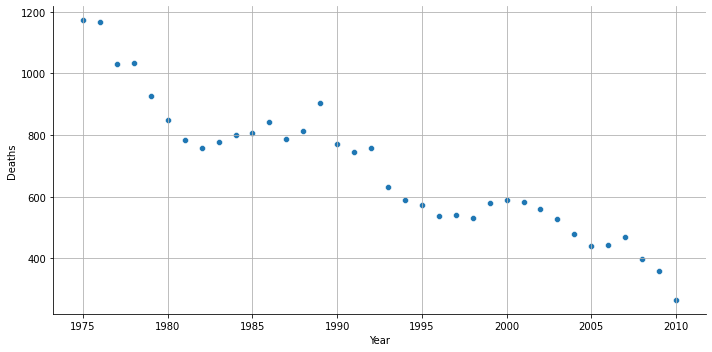

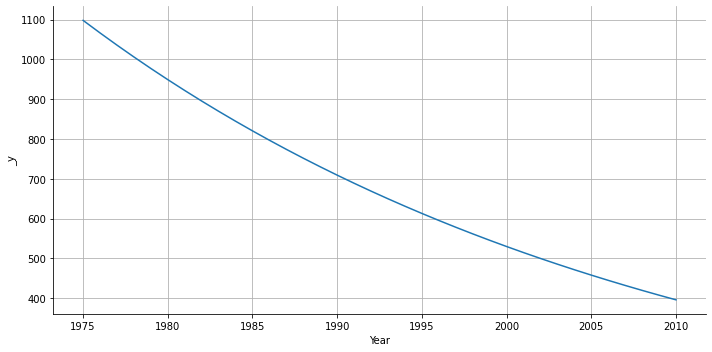

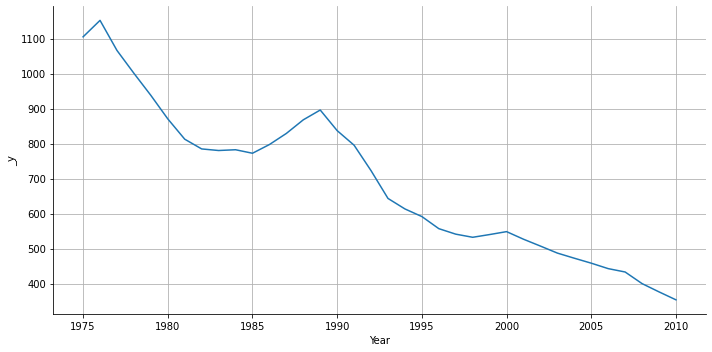

In [ ]:
sns.relplot(x=cars['Year'], y=cars['Deaths'], kind='scatter', aspect=2)
plt.grid()
sns.relplot(x=cars['Year'], y=fit_0, kind='line', aspect=2)
plt.grid()
sns.relplot(x=cars['Year'], y=fit_1, kind='line', aspect=2)
plt.grid()

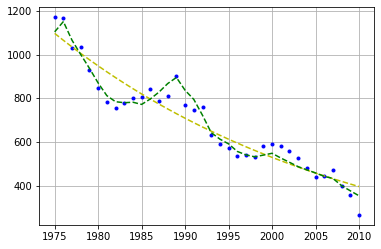

In [ ]:
plt.plot(cars['Year'], cars['Deaths'], 'b.')
plt.plot(cars['Year'], fit_0, 'y--')
plt.plot(cars['Year'], fit_1, 'g--')
plt.grid()
plt.show()

In [ ]:
AIC_0 = mdl_0.aic
AIC_1 = mdl_1.aic
print(AIC_0)
print(AIC_1)

561.0501379353746
389.5079221515389


## Model with all second order interactions

In [ ]:
mdl_2 = smf.glm('Deaths ~ (Year+Cars+Fuel)**2', data=cars, family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(mdl_2.summary())
mdl_2.params

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                   36
Model:                            GLM   Df Residuals:                       29
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -178.85
Date:                Thu, 04 Aug 2022   Deviance:                       58.102
Time:                        11:04:59   Pearson chi2:                     58.1
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    266.3051     90.421      2.945      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


Intercept    2.663051e+02
Year        -1.325924e-01
Cars         3.570719e-03
Fuel        -2.383679e-02
Year:Cars   -1.296810e-06
Year:Fuel    1.209025e-05
Cars:Fuel   -3.944318e-08
dtype: float64

In [ ]:
AIC_2 = mdl_2.aic
print(AIC_2)

371.70587240887335


Vidíme, že hodnota AIC se opět snížila, i když interakce se v modelu zdají nevýznamné. Odstraníme tu nejméně významnou dle p-hodnoty, tedy `Cars:Fuel`.  Další možnost, jak se rozhodnout, kterou proměnnou z modelu vypustit nabízí použití funkce `drop1()`, která je v R-ku. Ale v pythonu určitě bude taková podobná funkce existovat také. Vynecháme interakci s největší p-hodnotou a to je: Cars:Fuel

In [ ]:
mdl_3 = smf.glm('Deaths ~ (Year+Cars+Fuel)**2- Cars:Fuel', data=cars, family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(mdl_3.summary())
coef_3 = mdl_3.params
print(coef_3)
AIC_3 = mdl_3.aic
print(AIC_3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                   36
Model:                            GLM   Df Residuals:                       30
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -178.88
Date:                Thu, 04 Aug 2022   Deviance:                       58.157
Time:                        11:04:59   Pearson chi2:                     58.1
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    245.9437     25.484      9.651      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


Hodnota AIC se opět snížila, vynecháme další nevýznamnou interakci `Year:Cars`

In [ ]:
mdl_4 = smf.glm('Deaths ~ (Year+Cars+Fuel)**2- Cars:Fuel - Year:Cars', data=cars, family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(mdl_4.summary())
coef_4 = mdl_4.params
print(coef_4)
AIC_4 = mdl_4.aic
print(AIC_4)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                   36
Model:                            GLM   Df Residuals:                       31
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -178.95
Date:                Thu, 04 Aug 2022   Deviance:                       58.303
Time:                        11:04:59   Pearson chi2:                     58.3
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    251.1065     21.622     11.614      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


Opět došlo ke snížení AIC a všechny proměnné a interakce už jsou v modelu významné.

Porovnejme ještě modely mezi sebou. Nejdříve Model 4 a Model 3

In [ ]:
# viz další info: https://www.statsmodels.org/dev/generated/statsmodels.stats.anova.anova_lm.html
from scipy import stats

def calculate_nested_f_statistic(small_model, big_model):
    """Given two fitted GLMs, the larger of which contains the parameter space of the smaller, return the F Stat and P value corresponding to the larger model adding explanatory power"""
    addtl_params = big_model.df_model - small_model.df_model
    f_stat = (small_model.deviance - big_model.deviance) / (addtl_params * big_model.scale)
    df_numerator = addtl_params
    # use fitted values to obtain n_obs from model object:
    df_denom = (big_model.fittedvalues.shape[0] - big_model.df_model)
    p_value = stats.f.sf(f_stat, df_numerator, df_denom)
    return (f_stat, p_value)

In [ ]:
calculate_nested_f_statistic(mdl_4,mdl_3)

(0.14654238533386632, 0.7044740633850033)

Vidíme, že mezi nimi není významný rozdíl, jako lepší tedy bereme Model 4, který má méně parametrů (tomu odpovídá i hodnota AIC). Ještě porovnáme Model 1 bez interakcí s Modelem 4 s jednou interakcí

In [ ]:
calculate_nested_f_statistic(mdl_1,mdl_4)

(23.60041406178351, 3.001009359083922e-05)

Tenokráte je rozdíl významný, jako prozatím finální model tedy budeme uvažovat Model 4.

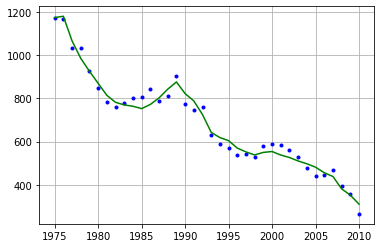

In [ ]:
fit_4 = mdl_4.predict()
plt.plot(cars["Year"], cars["Deaths"], 'b.')
plt.plot(cars["Year"], fit_4, 'g-')
plt.grid()

K výběru vhodných proměnných lze použít i automatickou proceduru zpětného výběru pomocí funkce `step()`, viz. 1. cvičení. Tento model by nám vrátil stejný model jako mdl_4.

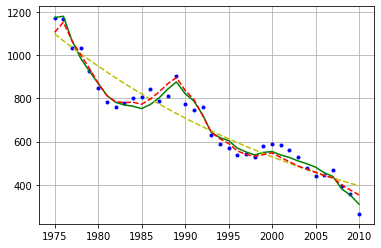

In [ ]:
plt.plot(cars["Year"], cars["Deaths"], 'b.')
plt.plot(cars["Year"], fit_4, 'g-')
plt.plot(cars['Year'], fit_0, 'y--')
plt.plot(cars['Year'], fit_1, 'r--')
plt.grid()

In [ ]:
# step "backward" missing

## Analysis of residuals and influential observations


In [ ]:
# https://www.statsmodels.org/dev/generated/statsmodels.genmod.generalized_linear_model.GLMResults.html
rds = mdl_4.resid_deviance
fitted = mdl_4.fittedvalues

missing: scatter smooth

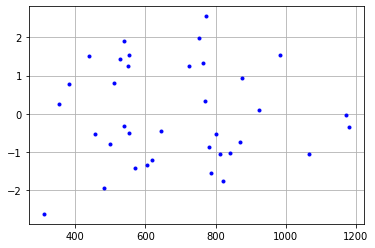

In [ ]:
plt.plot(fitted, rds, 'b.')
plt.grid()

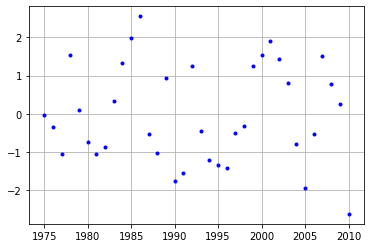

In [ ]:
plt.plot(cars["Year"], rds, 'b.')
plt.grid()

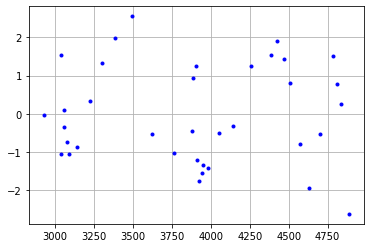

In [ ]:
plt.plot(cars["Cars"], rds, 'b.')
plt.grid()

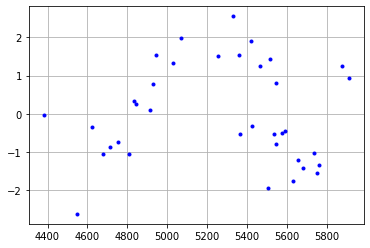

In [ ]:
plt.plot(cars["Fuel"], rds, 'b.')
plt.grid()

Obrázky reziduí vypadají poměrně dobře až na obrázek vpravo dole pro proměnnou `Fuel`. To by mohlo značit, že není v modelu obsažena správně, např. může chybět nějaká její mocnina nebo jiná transformace. Malé a velké hodnoty `FUEL` mají za následek záporná rezidua, proměnnou tedy vystředujeme a najdeme vhodnou transformaci, kterou přidáme do modelu.

In [ ]:
fuel_2 = np.log(np.abs(cars["Fuel"]-np.mean(cars["Fuel"])))
cars['Fuel_2'] = fuel_2
cars.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,Deaths,Cars,Fuel,Fuel_2
20,1975,1172,2931,4383,6.781341
21,1976,1168,3060,4624,6.461859
22,1977,1031,3039,4811,6.116444
23,1978,1034,3042,4945,5.765974
24,1979,928,3059,4913,5.861498


In [ ]:
mdl_5 = smf.glm('Deaths ~ (Year+Cars+Fuel)**2- Cars:Fuel - Year:Cars + Fuel_2', data=cars, family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(mdl_5.summary())
fit_5 = mdl_5.predict()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                   36
Model:                            GLM   Df Residuals:                       30
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -169.68
Date:                Thu, 04 Aug 2022   Deviance:                       39.759
Time:                        11:05:00   Pearson chi2:                     39.8
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    260.1512     21.911     11.873      0.0

Všecny parametry jsou v modelu významné a navíc došlo kdalšímu poklesu hodnoty AIC. Porovnejme ještě modely 4 a 5 pomocí LRT testu

In [ ]:
calculate_nested_f_statistic(mdl_4,mdl_5)

(18.54452176720401, 0.00015487207280004235)

Rozdíl je významný, lepší je tedy Model 5. Nelze tvrdit, že je to nejlepší možný model, jistě by šly najít i jiné transformace, případně transformace, které by se aplikovali na proměnnou `FUEL` už na začátku modelování. 


Zkontrolujeme rezidua Modelu 5.

In [ ]:
rds_5 = mdl_5.resid_deviance
fitted_5 = mdl_5.fittedvalues

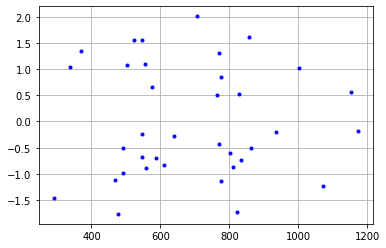

In [ ]:
plt.plot(fitted_5, rds_5, 'b.')
plt.grid()

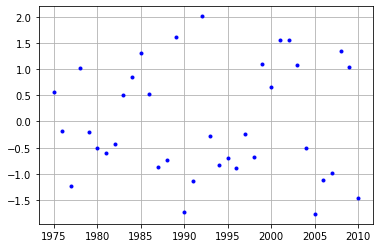

In [ ]:
plt.plot(cars["Year"], rds_5, 'b.')
plt.grid()

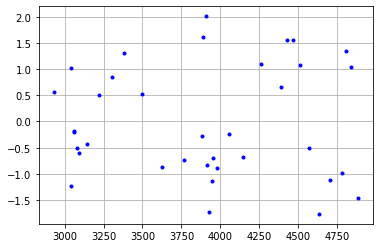

In [ ]:
plt.plot(cars["Cars"], rds_5, 'b.')
plt.grid()

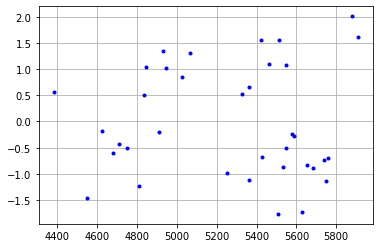

In [ ]:
plt.plot(cars["Fuel"], rds_5, 'b.')
plt.grid()

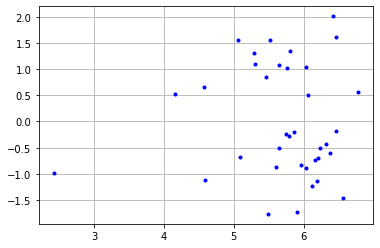

In [ ]:
plt.plot(cars["Fuel_2"], rds_5, 'b.')
plt.grid()

Rezidua teď vypadají mnohem rovnoměrněji rozdělena.Podívejme se ješte na vhodnost použité spojovací funkce a normalitu reziduí

In [ ]:
# missing
'''par(mfrow=c(1,2))
eta <- mdl_5$linear.predictor
z <- resid(mdl_5, type="working") + eta
plot( z ~ eta, las=1,
      xlab="Linear predictor, eta", ylab="Working responses, z")
abline(0, 1, col="grey")
qqnorm(r.ds)
qqline(r.ds)'''

'par(mfrow=c(1,2))\neta <- mdl_5$linear.predictor\nz <- resid(mdl_5, type="working") + eta\nplot( z ~ eta, las=1,\n      xlab="Linear predictor, eta", ylab="Working responses, z")\nabline(0, 1, col="grey")\nqqnorm(r.ds)\nqqline(r.ds)'

Co se týče spojovací funkce, zdá být vše v pořádku. Rezidua vykazují jistou odchylky od normality, ale připomeňme, že v poissonovské regresi by měla být rezidua "přibližně" normálně rozdělena.



### Influential observations analysis by `inflence.measures()`

In [ ]:
influence = mdl_5.get_influence()
cooks = influence.cooks_distance
print(cooks)

(array([0.0918546 , 0.00355036, 0.04361811, 0.02692167, 0.00093712,
       0.00569527, 0.01181869, 0.00570958, 0.00588998, 0.01672329,
       0.03916254, 0.02995578, 0.01822312, 0.0227518 , 0.24347486,
       0.12245646, 0.03943239, 0.1263725 , 0.00094981, 0.01269249,
       0.01570497, 0.02478129, 0.00107418, 0.00532031, 0.01178922,
       0.00969993, 0.03485378, 0.04298209, 0.02663106, 0.00661968,
       0.07701394, 0.03036674, 0.25368121, 0.09830554, 0.08409154,
       0.68384436]), array([0.99669736, 0.99999976, 0.99959837, 0.99990126, 1.        ,
       0.99999901, 0.9999913 , 0.999999  , 0.99999891, 0.99997568,
       0.99970583, 0.99986507, 0.99996866, 0.99993973, 0.95821385,
       0.99277381, 0.99969993, 0.99213821, 1.        , 0.99998925,
       0.9999798 , 0.99992255, 0.99999999, 0.99999919, 0.99999137,
       0.99999516, 0.99979024, 0.99961503, 0.99990435, 0.99999845,
       0.99797617, 0.9998596 , 0.95391644, 0.9960192 , 0.99741387,
       0.66395833]))


In [ ]:
hatvalues = mdl_5.get_hat_matrix_diag()
print(hatvalues)

[0.47508356 0.3251197  0.1313319  0.11816149 0.10272848 0.10833707
 0.14363862 0.14003833 0.10830677 0.11010547 0.10660554 0.31037871
 0.11277251 0.17670152 0.28528085 0.17101753 0.13680556 0.13668154
 0.06230696 0.09302301 0.14657117 0.14209967 0.09798466 0.06294442
 0.05227653 0.10617104 0.07310107 0.08606138 0.10741271 0.12072629
 0.11854619 0.11732075 0.46363634 0.20210892 0.25196273 0.49665102]


In [ ]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [ ]:
n, npar = cars.shape
npar = npar - 1 # máme sloupec indexů
line = 8/(n-2*npar)
line_2 = 2*npar/(n)

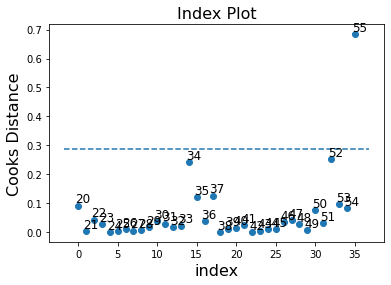

In [ ]:
influence.plot_index()
abline(0, line)
plt.xlabel('index')
plt.ylabel('Cooks Distance')
plt.show()

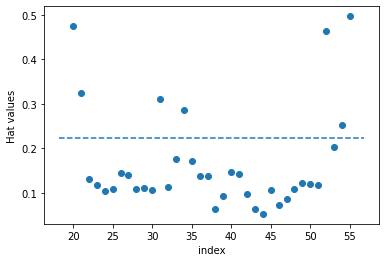

In [ ]:
plt.scatter(cars.index, hatvalues)
abline(0, line_2)
plt.xlabel('index')
plt.ylabel('Hat values')
plt.show()

Pozorování 36 bylo označeno jako influenční. Pokud použijeme i funkci pro počítání influenčních měr

In [ ]:
influence = mdl_5.get_influence()
inf_sum = influence.summary_frame()
print(inf_sum)

    dfb_Intercept  dfb_Year  dfb_Cars  dfb_Fuel  dfb_Year:Fuel  dfb_Fuel_2  \
20       0.501802 -0.501422  0.225852 -0.444275       0.442526    0.148948   
21      -0.075107  0.075671 -0.092776  0.041186      -0.040856   -0.010060   
22      -0.083714  0.084845 -0.187434 -0.005054       0.005710    0.055077   
23      -0.093208  0.093434 -0.014857  0.115229      -0.115162   -0.139770   
24       0.023402 -0.023649  0.023143 -0.019090       0.019078    0.016287   
25       0.035883 -0.036972  0.090077 -0.004909       0.005070   -0.031166   
26       0.057064 -0.058953  0.161937  0.003838      -0.003577   -0.074537   
27       0.057591 -0.058915  0.120085 -0.013110       0.013268   -0.049722   
28      -0.086907  0.088126 -0.119814  0.046047      -0.046133    0.023648   
29      -0.175390  0.176991 -0.167859  0.129509      -0.129336   -0.106755   
30      -0.259498  0.261452 -0.197975  0.213094      -0.212867   -0.227067   
31      -0.116152  0.116614 -0.027826  0.132160      -0.131722  

dostaneme, že jedno pozorování bylo detekováno jako influenční pomocí Cookovy vzdálenosti a jedná se o pozorování 36. Naopak pomocí potenciálů `hat` žádné podezřelé pozorování označeno nebylo. Dojdeme-li k závěru, že pozorování 36 je "špatné", můžeme ho odstranit z modelu. Potom:



In [ ]:
mdl_5_out = smf.glm('Deaths ~ (Year+Cars+Fuel)**2- Cars:Fuel - Year:Cars + Fuel_2', data=cars, family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(mdl_5_out.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                   36
Model:                            GLM   Df Residuals:                       30
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -169.68
Date:                Thu, 04 Aug 2022   Deviance:                       39.759
Time:                        11:05:02   Pearson chi2:                     39.8
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    260.1512     21.911     11.873      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


In [ ]:
fit_5_out = mdl_5_out.predict()

Vidíme, že došlo k mírné změně koeficientů. Rozdíl v odhadech.

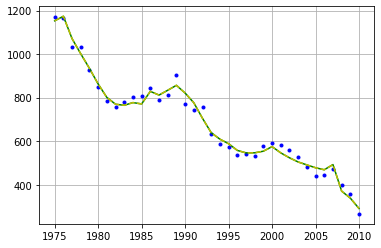

In [ ]:
plt.plot(cars["Year"], cars["Deaths"], 'b.')
plt.plot(cars["Year"], fit_5, 'g-')
plt.plot(cars['Year'], fit_5_out, 'y--')
plt.grid()

se však tato změna projeví jen nepatrně u posledního pozorování.

## ML approach: forecasting the future.

Last task: Hide last 5 observations, train the model using remaining and try to predict response for the 5 hidden latest observations. Plot predictiions together with true observations.

In [ ]:
# missing